In [2]:
from discover_lora_vae.models import LoraVAE
import diffusers
import torch
from tqdm import tqdm 
from common.utils import make_weight_vector, recover_lora, convert_to_multi
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import johnsonsu, norm


def dist(num_samples=10_000, mean=0, std=1, kurtosis=3, skewness=0.0):
    johnson_su = johnsonsu.fit(np.random.normal(size=num_samples), fa=skewness, fb=np.sqrt(kurtosis))
    samples = johnsonsu.rvs(*johnson_su, size=num_samples)
    scaled_samples = std * (samples - np.mean(samples)) / np.std(samples) + mean

    return scaled_samples


/home/ubuntu/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
state_dict = torch.load("/home/ubuntu/AutoLoRADiscovery/PClora/model-output/lora_layers.pth")

In [3]:
weights = []
for k, v in state_dict['state_dict'].items():
    if isinstance(v, torch.Tensor):
        weights.append(v.flatten())

weights = torch.stack(weights)

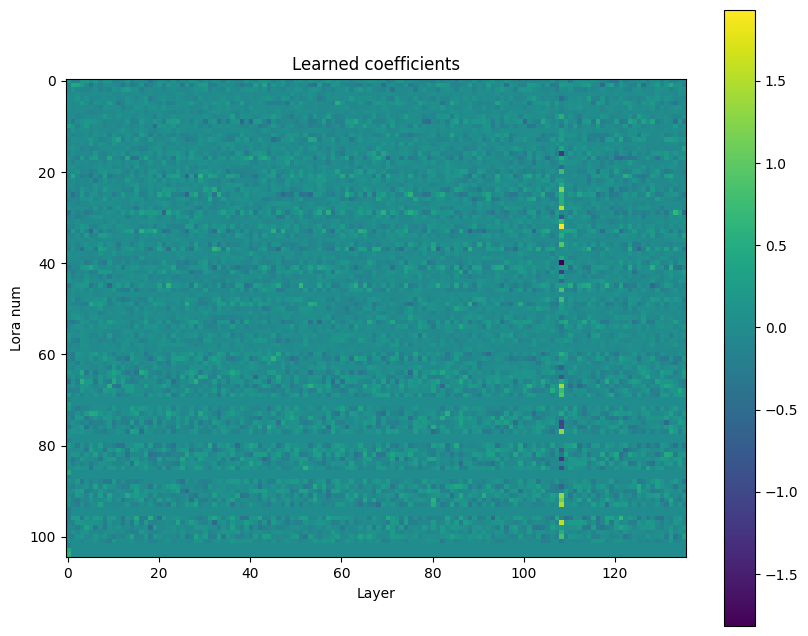

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(weights.cpu().numpy())
plt.xlabel("Layer")
plt.ylabel("Lora num")
plt.title("Learned coefficients")
plt.colorbar()


In [78]:
state_dict = torch.load("/home/ubuntu/AutoLoRADiscovery/PClora/model-output/lora_layers.pth")
# state_dict = torch.load("/home/ubuntu/AutoLoRADiscovery/PClora/model-output/checkpoint-1500")

In [79]:
weights = []
for k, v in state_dict['state_dict'].items():
    if isinstance(v, torch.Tensor):
        weights.append(v.flatten())
weights = torch.stack(weights)

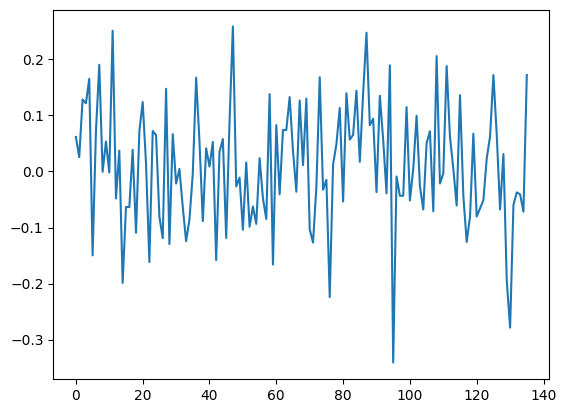

In [80]:
plt.plot(weights.cpu().squeeze().numpy())

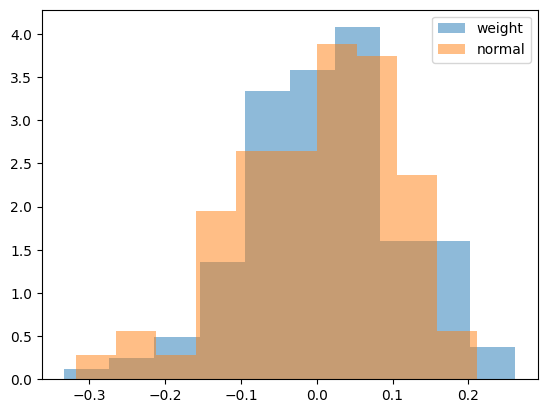

In [76]:
plt.hist(weights.cpu().squeeze(), bins=10, label="weight", density=True, alpha=0.5)
plt.hist(dist(num_samples=weights.shape[1], kurtosis=3.5 ,std=weights.std().item()), bins=10, alpha=0.5, label="normal", density=True)
plt.legend()

In [81]:
weights.std()


tensor(0.1074, device='cuda:0')

: 

In [3]:
import torch
a = torch.ones(1)

In [6]:
a - 0.0001

tensor([0.9999])